In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline_P0_foward_price

In [33]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01, 
                                                                                deal_with_skewness = False)
model_performance = []

In [25]:
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)

In [26]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(x_train, y_train)
# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 56.067647416798316
Root Mean Squared Error: 7.487833292535186
Mean Squared Error: 56.067647416798316
Root Mean Squared Error: 7.487833292535186
R-squared: -1.500676055066208e-05


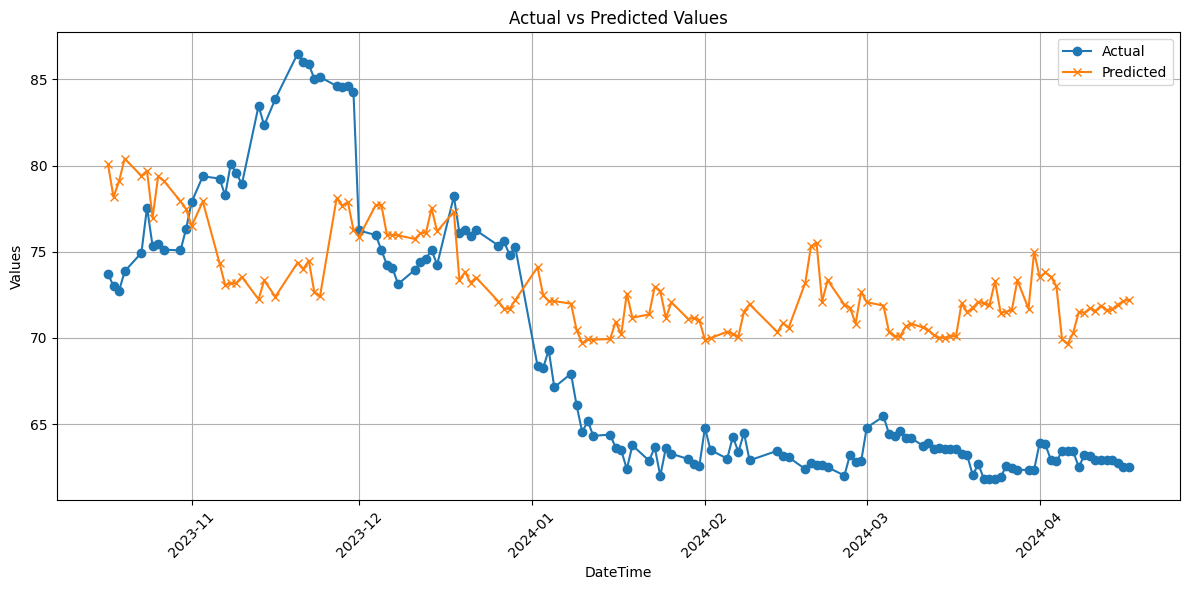

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Mean Squared Error', ascending=True)
performance_df

,Model,Mean Squared Error,Root Mean Squared Error,R-squared
0,"XGBRegressor(base_score=None, booster=None, ca...",56.067647,7.487833,-0.000015


## Gradient Boosted - Adjusted Hyperparameters

In [29]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=30,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=1
)
model.fit(x_train, y_train)
# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 27.83834992490845
Root Mean Squared Error: 5.276206016154832
Mean Squared Error: 27.83834992490845
Root Mean Squared Error: 5.276206016154832
R-squared: 0.5034789406908631


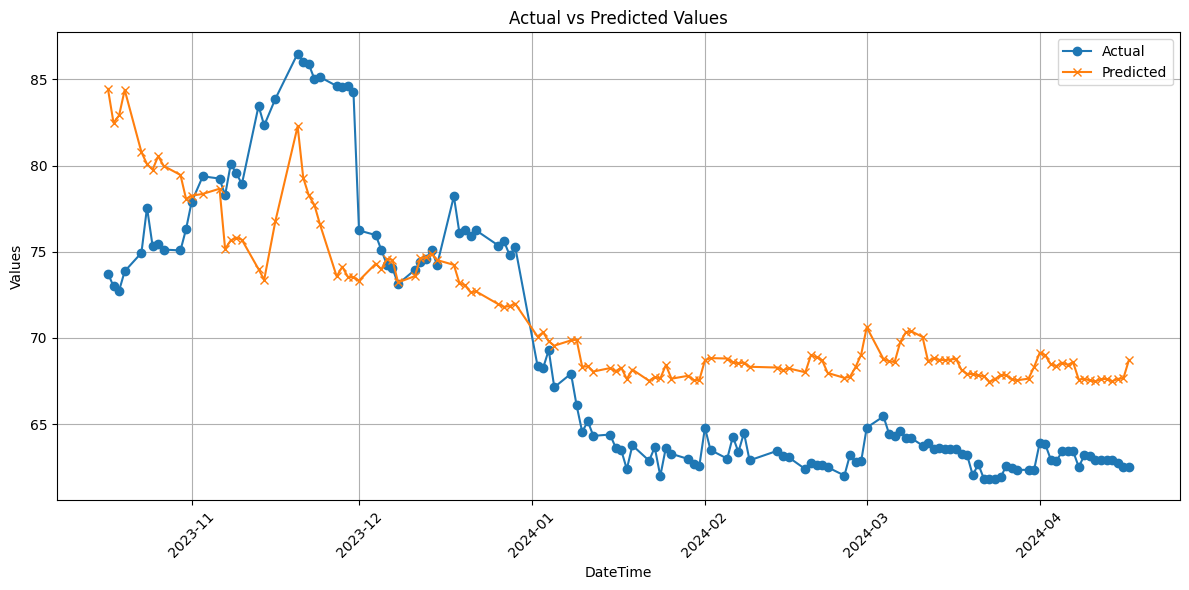

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Tuned the HyperParameters using GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror'),
    param_distributions=param_grid,
    n_iter=50,  # Test 50 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search.fit(x_train, y_train)

# Predictions and evaluation
y_pred =random_search.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': random_search,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 37.1538860458982
Root Mean Squared Error: 6.095398760204143
Mean Squared Error: 37.1538860458982
Root Mean Squared Error: 6.095398760204143
R-squared: 0.3373282932817001


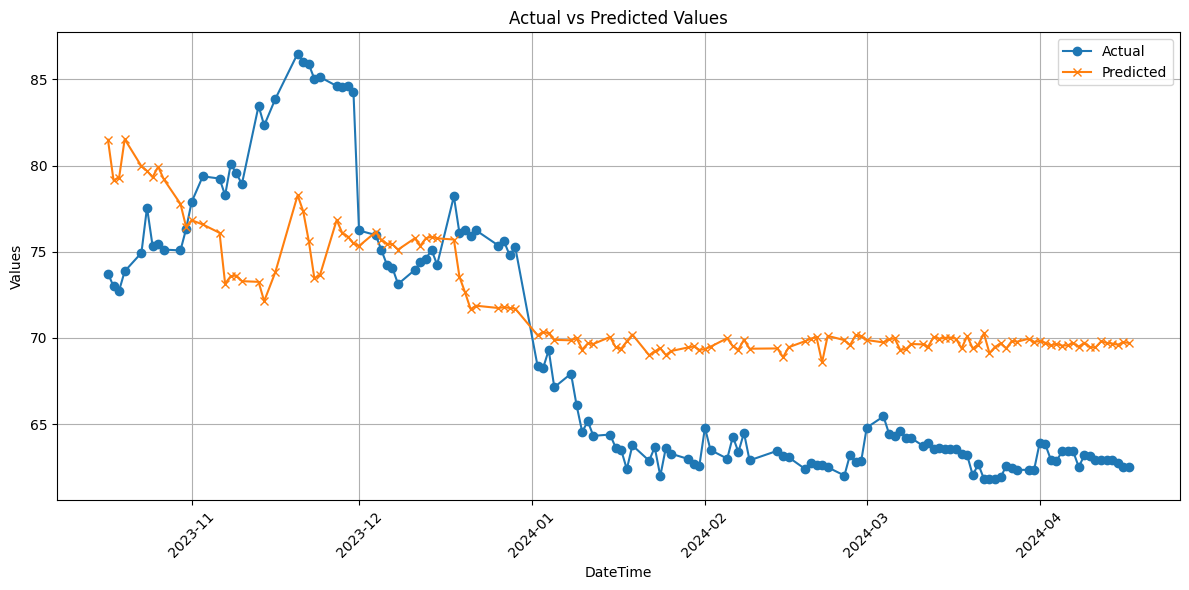

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()